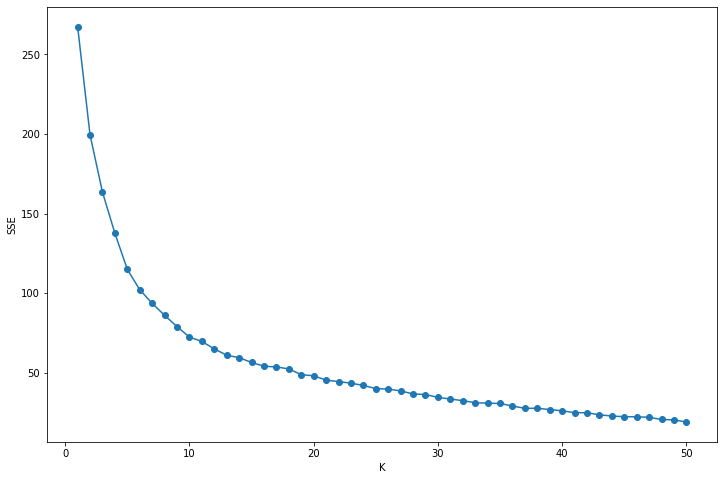

C:\Users\wangcy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wangcy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\wangcy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32676 missing fr

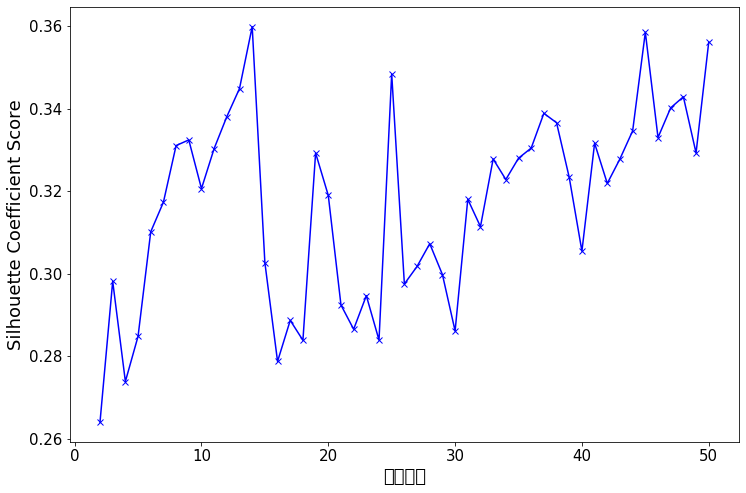

      0
0    14
1    14
2    14
3     2
4     2
..   ..
200   8
201   1
202   8
203   5
204   1

[205 rows x 1 columns]


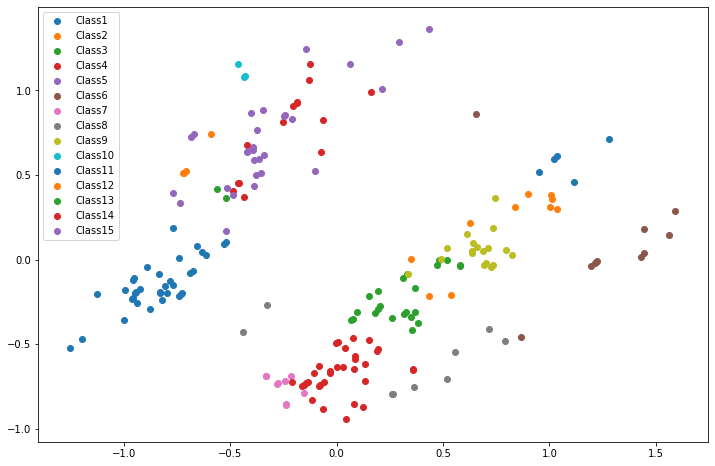

volkswagen 1131 deluxe sedan的竞品如下:
['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi fox', 'bmw 320i', 'bmw x1', 'isuzu D-Max ', 'nissan teana', 'nissan clipper', 'porsche macan', 'renault 5 gtl', 'saab 99e', 'saab 99le', 'toyota corona liftback', 'toyota corolla', 'toyota starlet', 'toyota tercel', 'toyota corolla', 'toyota cressida', 'toyota corolla liftback', 'toyota corona']
volkswagen model 111的竞品如下:
['mazda glc deluxe', 'mazda rx-7 gs', 'nissan gt-r', 'toyota corona', 'toyota corolla', 'vokswagen rabbit']
volkswagen type 3的竞品如下:
['audi 100 ls', 'audi 100ls', 'audi 100ls', 'audi 5000', 'honda civic', 'mitsubishi mirage g4', 'nissan dayz', 'nissan fuga', 'nissan otti', 'renault 12tl', 'saab 99le', 'saab 99gle', 'subaru baja', 'subaru tribeca', 'toyota corolla', 'toyota corona', 'toyota corolla', 'toyota mark ii']
volkswagen 411 (sw)的竞品如下:
['audi 100 ls', 'audi 100ls', 'audi 100ls', 'audi 5000', 'honda civic', 'mitsubishi mirage g4', 'nissan dayz', 'nis

In [18]:
# 使用KMeans进行聚类
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 数据加载
data = pd.read_csv('CarPrice_Assignment.csv',encoding='gbk')
# print(data)

train_x_initial = data[["symboling","fueltype","aspiration","doornumber",
                "carbody","drivewheel","enginelocation","wheelbase",
                "carlength","carwidth","carheight","curbweight",
                "enginetype","cylindernumber","enginesize","fuelsystem",
                "boreratio","stroke","compressionratio","horsepower"
                ,"peakrpm","citympg","highwaympg","price"]]

train_x = pd.DataFrame(train_x_initial)

# LabelEncoder 将Categorical类数据转换为数值
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Categorical_data = ["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
for item in Categorical_data:
    # print(item)
    train_x[item] = le.fit_transform(train_x[item])
# print(train_x)

# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv', index=False)
# print(train_x)

# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 51):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
x = range(1, 51)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

# K-Means 轮廓系数法：平均轮廓系数越大，聚类效果越好
clusters = range(2,51)
sc_scores = []
for k in clusters:  
    kmeans_model = KMeans(n_clusters=k, n_jobs = 6).fit(train_x)
    sc_score = metrics.silhouette_score(train_x, kmeans_model.labels_\
                        ,sample_size=10000, metric='euclidean')
    sc_scores.append(sc_score)
    # print(sc_scores)
#作出K—平均轮廓系数曲线
plt.figure()
plt.plot(clusters, sc_scores, 'bx-')
plt.rcParams['figure.figsize'] = [12,8]
plt.xlabel('分群数量',fontsize=18)
plt.ylabel('Silhouette Coefficient Score',fontsize=18)  #样本平均轮廓系数
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

'''
### 使用层次聚类
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(linkage='ward', n_clusters=25)
y = model.fit_predict(train_x)
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.savefig("CarPrice_Assignment_cluster_result.png", dpi=750, bbox_inches = 'tight')
plt.show()
'''

# 使用KMeans聚类，根据手肘法及轮廓系数法，选取15组分类
kmeans = KMeans(n_clusters=15)
kmeans.fit(train_x)
predict_y2 = kmeans.predict(train_x)
predict_y = pd.DataFrame(predict_y2)
print(predict_y)
# 合并聚类结果，插入到原数据中
result = pd.concat([data, predict_y],axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)


# 使用PCA降维到2D可视化，初步显示聚类结果
pca = sklearnPCA(n_components=2) 
transformed = pd.DataFrame(pca.fit_transform(train_x))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(15):
    ax.scatter(transformed[predict_y2==i][0], transformed[predict_y2==i][1], label='Class'+str(i+1))
    
plt.legend()
plt.show()

# 将vokswagen汽车的相应竞品找出
for i in range(len(result)):
    # 如果CarName包含'volkswagen'，则识别为大众汽车产品
    if 'volkswagen' in result.iloc[i]['CarName']:
        kmeans_index = result.iloc[i]['聚类结果']
        comp = []
        for j in range(len(result)):
            # 取聚类结果与大众汽车产品相同的非大众汽车产品集合
            if result.iloc[j]['聚类结果'] == kmeans_index:
                if 'volkswagen' in result.iloc[j]['CarName']:
                    continue
                if 'vw' in result.iloc[j]['CarName']:
                    continue
                else:
                    comp.append(str(result.iloc[j]['CarName']))
            else:
                continue
        print(result.iloc[i]['CarName']+'的竞品如下:')
        print(comp)
    # 如果CarName包含'vw'，则识别为大众汽车产品
    elif 'vw' in result.iloc[i]['CarName']:
        kmeans_index = result.iloc[i]['聚类结果']
        comp = []
        for j in range(len(result)):
            # 取聚类结果与大众汽车产品相同的非大众汽车产品集合
            if result.iloc[j]['聚类结果'] == kmeans_index:
                if 'volkswagen' in result.iloc[j]['CarName']:
                    continue
                if 'vw' in result.iloc[j]['CarName']:
                    continue
                else:
                    comp.append(str(result.iloc[j]['CarName']))
            else:
                continue
        print(result.iloc[i]['CarName']+'的竞品如下:')
        print(comp)
    else:
        continue

# 将结果导出到CSV文件中
# result.to_csv("CarPrice_Assignment_cluster_result.csv",index=False)
